<a href="https://colab.research.google.com/github/Noha-Magdy/AI-model-for-predicting-covid-19/blob/master/Data_analysisV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
from pandas.io.json import json_normalize
import json
print('Modules are imported.')

Modules are imported.


In [45]:
Corona_dataset = pd.read_csv("covid19_Confirmed_dataset.csv")

In [46]:
Corona_dataset= Corona_dataset.drop(["Lat","Long"],axis = 1)

In [47]:
#Aggregating the rows by country 
Corona_dataset_aggregated = Corona_dataset.groupby("Country/Region").sum()
Corona_dataset_aggregated.head(5)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27


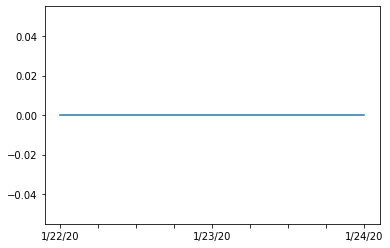

In [48]:
Corona_dataset_aggregated.loc["Egypt"][:3].plot()

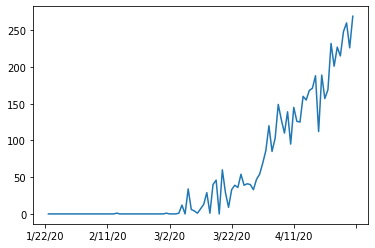

In [49]:
#Calculating and plotting the first derivative of the curve 
Corona_dataset_aggregated.loc["Egypt"].diff().plot()

In [50]:
#Finding the maximum infection rate for Egypt 
Corona_dataset_aggregated.loc["Egypt"].diff().max()

269.0

In [51]:
#Create a new column which is the mximum infection rate 
countries = list(Corona_dataset_aggregated.index)
max_infection_rates = []
for c in countries :
  max_infection_rates.append(Corona_dataset_aggregated.loc[c].diff().max())
Corona_dataset_aggregated["max_infection_rate"] = max_infection_rates

In [52]:
Corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27,5.0


In [53]:
Corona_data = pd.DataFrame(Corona_dataset_aggregated["max_infection_rate"])
Corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [54]:
zz= Corona_data.iloc[53]
print(Corona_data.index[53])

Egypt


In [55]:
#Importing the happiness worldwide dataset
happines_csv = pd.read_csv("worldwide_happiness_report.csv")
happines_csv.head() 

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [56]:
#Drop useless columns   
useless_cols = ["Overall rank","Score", "Generosity","Perceptions of corruption"]
happines_csv.drop(useless_cols, axis = 1, inplace = True)
happines_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [57]:
#Changing the indices of the dataframe 
happines_csv.set_index("Country or region", inplace = True)
happines_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [58]:
#Joining the two Datasets 
data = Corona_data.join(happines_csv, how = "inner")
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


In [103]:
data.index[59]

'Iraq'

In [87]:
data.loc[data['max_infection_rate'] == 269.000].index

Index(['Egypt'], dtype='object')

In [60]:
#Check the correlation matrix 
data.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


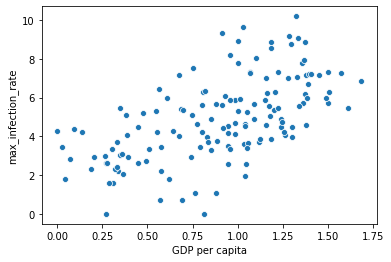

In [61]:
#Plotting GDP vs maximum infection rate 
x = data["GDP per capita"]
y = data["max_infection_rate"]
sns.scatterplot(x,np.log(y))

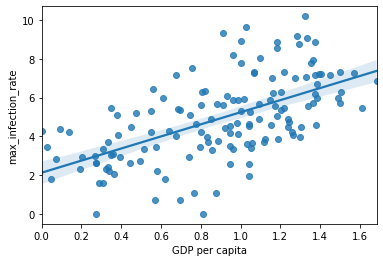

In [62]:
sns.regplot(x,np.log(y))

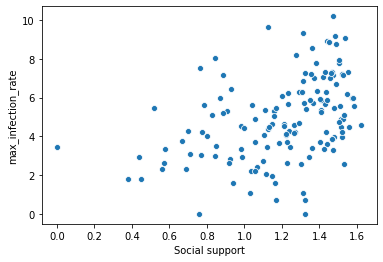

In [63]:
#Plotting Social support vs maximum infection rate 
x1 = data["Social support"]
sns.scatterplot(x1,np.log(y))

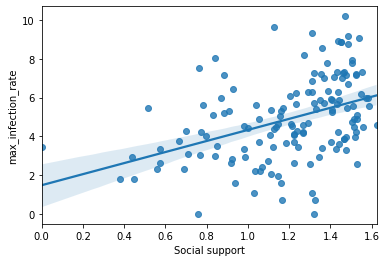

In [64]:
sns.regplot(x1,np.log(y))

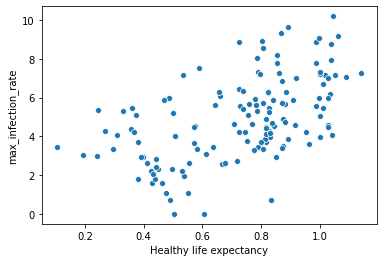

In [65]:
#Plotting Healthy life expectancy vs maximum infection rate 
x2 = data["Healthy life expectancy"]
sns.scatterplot(x2,np.log(y))

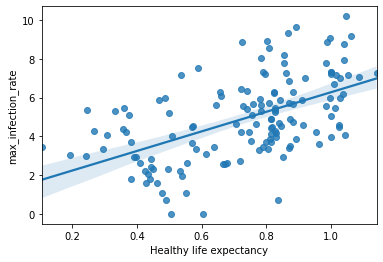

In [66]:
sns.regplot(x2,np.log(y))

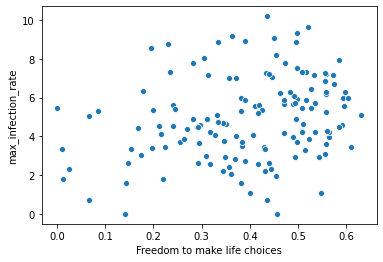

In [67]:

#Plotting Freedom to make life choices vs maximum infection rate 
x3 = data["Freedom to make life choices"]
sns.scatterplot(x3,np.log(y))

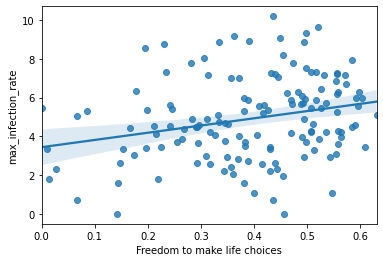

In [68]:
sns.regplot(x3,np.log(y))

# **PCA**

**In this section I'm trying to apply PCA on happiness dataset worldwide**

In [69]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 
%matplotlib inline

In [70]:
data.head(10)

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283
Australia,497.0,1.372,1.548,1.036,0.557
Austria,1321.0,1.376,1.475,1.016,0.532
Azerbaijan,105.0,1.043,1.147,0.769,0.351
Bahrain,301.0,1.362,1.368,0.871,0.536
Bangladesh,641.0,0.562,0.928,0.723,0.527


In [71]:
X = data.iloc[:,1:5].values 
Y = data.iloc[:,0].values

In [72]:
# do the standardization to bring all the feature spaces with mean = 0 and variance = 1
X_std = StandardScaler().fit_transform(X)

In [73]:
pca = PCA(n_components=2) 
# Here we can also give the percentage as a paramter to the PCA function as pca = PCA(.95). .95 means that we want to include 95% of the variance. Hence PCA will return the no of components which describe 95% of the variance. However we know from above computation that 2 components are enough so we have passed the 2 components.
principalComponents = pca.fit_transform(X_std) 
principalDf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'])
principalDf.head(5) # prints the top 5 rows

,principal component 1,principal component 2
0,3.774764,1.484922
1,0.220367,0.118677
2,0.560376,2.065577
3,-1.221656,-0.109800
4,0.383447,0.702141


In [74]:
principalComponents.shape

(143, 2)

In [93]:
eg= principalComponents[38]
print(eg)

[0.83753724 0.83515718]


# **Note**
we can get the sorted countries that are close to Egypt not just Iraq as one country 

In [102]:
##Applying L2 distance to get the colsest country to Egypt
from scipy.spatial import distance
def getcountry(df):
  d_min = np.inf
  min_i = 0
  for index,i in enumerate(df):
    d = distance.euclidean(df[38], i)
    if d < d_min and index!=38 :
      d_min = d
      min_i = index
  return d_min, min_i 
print(getcountry(principalComponents))

(0.0930068101093687, 59)


In [104]:
data.index[59]  #Iraq is the closest country to Egypt 

'Iraq'

Text(0, 0.5, 'Second principle component')

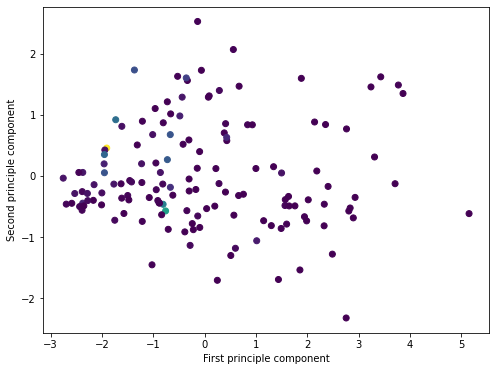

In [75]:
plt.figure(figsize=(8,6))
plt.scatter(principalComponents[:,0],principalComponents[:,1],c=data['max_infection_rate'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

**PCA for hsppiness worldwide dataset**

In [76]:
happiness= pd.read_csv("worldwide_happiness_report.csv")
#Changing the indices of the dataframe 
happiness.set_index("Country or region", inplace = True)

In [77]:
scaler=StandardScaler()
scaler.fit(happiness)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [78]:
scaled_data=scaler.transform(happiness)

In [79]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [80]:
x_pca=pca.transform(scaled_data)

In [81]:
scaled_data.shape

(156, 8)

In [82]:
x_pca.shape

(156, 2)